###### NYC FLIGHTS 2013 DATA SET EXPLORATORY ANALYSIS


In [1]:

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.11.3 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Mapltolib version:     2.0.0 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


I explored flights from NYC to Seattle. Used the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:

flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]

3923

(b) How many airlines fly from NYC to Seattle?

In [7]:

carriersN_to_seattle = flights_df1.carrier.unique()
print(carriersN_to_seattle)

['AS' 'DL' 'UA' 'B6' 'AA']


(c) How many unique air planes fly from NYC to Seattle?

In [8]:

flights_df1['tailnum'].nunique()


935

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:

flights_df1['arr_delay'].mean()

-1.0990990990990992

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:

# Find unique origins
nyc_origins = flights_df1['origin'].unique()
print(nyc_origins)


['EWR' 'JFK']


## Exploring delay patterns
Flights are often delayed. I considered the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
from datetime import datetime
flights_df['date'] = pd.to_datetime(flights_df.year*10000+flights_df.month*100+flights_df.day,format='%Y%m%d')

grouped_data = flights_df.groupby('date').mean()
print("\nLargest avg arr_delay")
print(grouped_data[grouped_data['arr_delay']==grouped_data.arr_delay.max()])
print("\nLargest avg dep_delay")
print(grouped_data[grouped_data['dep_delay']==grouped_data.dep_delay.max()])



Largest avg arr_delay
            Unnamed: 0    year  month  day     dep_time  dep_delay  \
date                                                                 
2013-03-08    143267.0  2013.0    3.0  8.0  1416.659574  83.536921   

               arr_time  arr_delay       flight    air_time     distance  \
date                                                                       
2013-03-08  1503.931078  85.862155  2013.537283  153.746867  1002.540347   

                 hour     minute  
date                              
2013-03-08  13.867334  29.926158  

Largest avg dep_delay
            Unnamed: 0    year  month  day     dep_time  dep_delay  \
date                                                                 
2013-03-08    143267.0  2013.0    3.0  8.0  1416.659574  83.536921   

               arr_time  arr_delay       flight    air_time     distance  \
date                                                                       
2013-03-08  1503.931078  85.862155  2013.53728

The date with the largest average departure as well as arrival delay was March 8th 2013.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
grouped_data_1 = flights_df[flights_df.dep_delay > 0].groupby('date').dep_delay.count().sort_values(ascending = False)
grouped_data_1.head(1)

date
2013-12-23    674
Name: dep_delay, dtype: int64

The worst day to fly out of NYC in 2013 if I dislike delayed flights was ['12-23-2013'] since the number of delayed flights for the day was :674

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [13]:
flights_df.groupby('month').dep_delay.mean().plot(title = "Average Departure Delays by Month")

On an average summer months seem to have greater departure delays than other times of the year. There is also another peak in December, which could probably be due to the holiday season.

(d) On average, how do departure delays vary over the course of a day?

In [14]:
flights_df.groupby('hour').dep_delay.mean().plot(title = "Average Departure Delays by hour")

Departure delays are the higheset betwen 12am and 3am, that is the early morning flights, and then the departure delays have a steep decline at 4 am and continue to slowly rise from 4 am to 8pm before increasing rapidly again and forming a small peak around 11 pm before declining at 12 pm.

Which flight departing NYC in 2013 flew the fastest?

In [15]:
flights_df['speed'] = flights_df.distance / flights_df.air_time
flights_df.sort_values('speed', ascending=False).head(1) 

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-05-25,11.723077


The fastest flight departing NYC was flight 1499, which departed from LGA towards ATL.


Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
flights_df['combination'] = flights_df.carrier +"-"+ flights_df.flight.astype('str') +"-"+ flights_df.dest
flights_df.groupby(['combination']).date.nunique()[flights_df.groupby(['combination']).date.nunique()==365]


combination
AA-119-LAX     365
AA-1357-SJU    365
AA-1611-MIA    365
AA-181-LAX     365
AA-59-SFO      365
B6-1783-MCO    365
B6-219-CLT     365
B6-359-BUR     365
B6-371-FLL     365
B6-431-SRQ     365
B6-703-SJU     365
DL-2159-MCO    365
DL-2391-TPA    365
EV-5712-IAD    365
UA-15-HNL      365
VX-251-LAS     365
VX-407-LAX     365
VX-413-LAX     365
Name: date, dtype: int64

The above flights happen every day, wherein the last three letters of the combination provide information on the destination of the flight. 


Who were the best carriers to take if you wanted to fly out of New York to Seattle in 2013 ?


In [17]:
sea_df = flights_df[flights_df.dest == "SEA"]
sea_df.groupby(['carrier','month']).dep_delay.mean().unstack('carrier').plot(title = "Average departure delays")
sea_df.groupby(['carrier','month']).arr_delay.mean().unstack('carrier').plot(title = "Average Arrival delays")


For the most part, Alaska Airlines had a low average arrival and departure delay. United Airlines consistently had a higher departure delay and Jet Blue had a consistently high arrival delay. American Airlines, had moderate to high average departure and arrival delays. Looking at the two graphs, Alaskan Airlines and Delta Airlines would have been a good bet to travel in, in 2013 from NYC to Seattle. 


What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

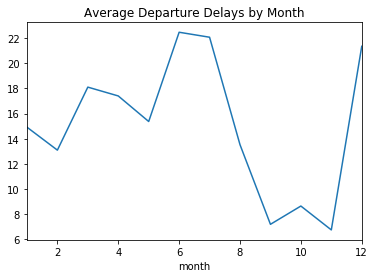

In [31]:
weather_df = pd.read_csv("weather.csv")
merged_data = pd.merge(flights_df, weather_df, on=['year','month','day','hour','origin'], how='inner')
%matplotlib inline
merged_data.groupby('month').dep_delay.mean().plot(title = "Average Departure Delays by Month")


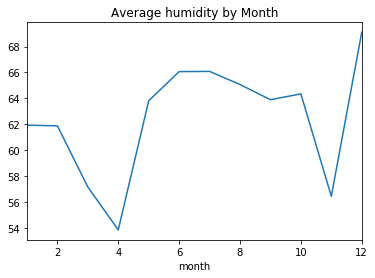

In [30]:
merged_data.groupby('month').humid.mean().plot(title = "Average humidity by Month")

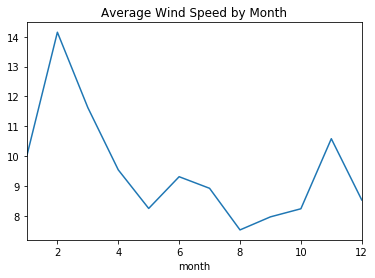

In [26]:
merged_data.groupby('month').wind_speed.mean().plot(title = "Average Wind Speed by Month")

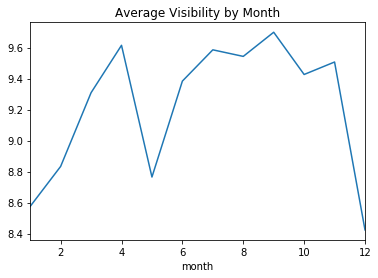

In [27]:
merged_data.groupby('month').visib.mean().plot(title = "Average Visibility by Month")

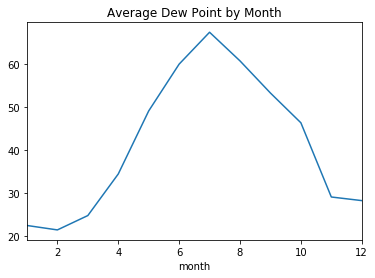

In [28]:
merged_data.groupby('month').dewp.mean().plot(title = "Average Dew Point by Month")

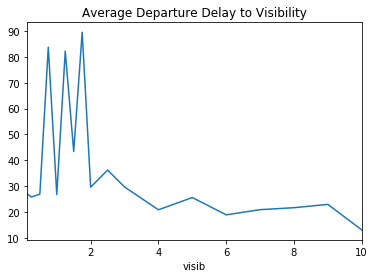

In [29]:
merged_data.groupby('visib').dep_delay.mean().plot(title = "Average Departure Delay to Visibility")

From the above graphs we see that the delay of flights is affected by visibility - i.e. when visibility decreases there is an increase in the average delay of flights. The delay of flights also seems to be affected by humidity to some extent but not by wind speed. To prove that when visibility decreases there is an increase in the average delay of flights, we plot visibility and average departure delays together we see that low visibility indeed leads to high number of departure delays.